#### **Ứng dụng Machine Learning trong dự đoán sống sót của hành khách Titanic**

##### **Bài toán đặt ra**  
Bài toán Titanic là **phân loại nhị phân**, dự đoán khả năng sống sót của hành khách dựa trên các thông tin như tuổi, giới tính, hạng vé, số người thân đi cùng, giá vé,... Mục tiêu là xây dựng mô hình Machine Learning để dự đoán biến **Survived (0/1)**.  

##### **Mô tả tập dữ liệu**  
- **PassengerId**: ID định danh hành khách (duy nhất cho mỗi người)  
- **Survived**: Biến mục tiêu, 1 = sống sót, 0 = tử vong  
- **Pclass**: Hạng vé, 1 = hạng nhất, 2 = trung bình, 3 = phổ thông  
- **Name**: Họ tên đầy đủ của hành khách  
- **Sex**: Giới tính (male hoặc female)  
- **Age**: Tuổi hành khách (có thể bị thiếu dữ liệu)  
- **SibSp**: Số anh/chị/em hoặc vợ/chồng đi cùng  
- **Parch**: Số cha/mẹ hoặc con cái đi cùng  
- **Ticket**: Mã số vé  
- **Fare**: Giá vé (dạng float)  
- **Cabin**: Số hiệu phòng (cabin), có thể bị thiếu nhiều  
- **Embarked**: Cảng lên tàu, C = Cherbourg, Q = Queenstown, S = Southampton  

##### **Các bước thực hiện**  
- Dataset Info  
- EDA  
- Feature Engineering  
- Model  

##### **Các model sử dụng**  
Logistic Regression, Decision Tree, Random Forest, SVM, KNN, Naive Bayes, Artificial Neural Network (ANN).  


## **Dataset Info**

In [22]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
data.shape

(156, 12)

In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [27]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [28]:
desc = data.describe()
desc.style.apply(
    lambda s: ['background-color: red' if s.name == 'mean' else '' for _ in s],
    axis=1
)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


Ở đây ta có 3 cột bị nhận giá trị null - Age , Cabin , Embarked
Từ bảng trên ta thấy : 
- Age có nhiều giá trị thiếu và dữ liệu có nhiều oulier => dùng median 
- Embarked  để dữ liệu gần giống với thực tế => dùng mode 
- Cabin do số lượng missing value ~80% => Loại bỏ cột này
- Loại bỏ các cột không có ý nghĩa như ID định danh , mã vé => PassengerId , Ticket


In [29]:
data['Age'].fillna(data["Age"].median() , inplace = True)
data["Embarked"].fillna(data["Embarked"].mode()[0] , inplace = True)
data = data.drop(columns=["Cabin" , "PassengerId" , "Ticket" , "Name"])

#### EDA

In [30]:
col = list(data.columns)
for c in ['Survived' , 'Embarked']:
  col.remove(c)
categorical_feature = ['Survived' , "Embarked"]
numerical_feature = [*col]
print("Categorical_Feature:" , ", ".join(categorical_feature))
print("Numerical_Feature:" , ", ".join(col))

Categorical_Feature: Survived, Embarked
Numerical_Feature: Pclass, Sex, Age, SibSp, Parch, Fare


#### Phân phối survived

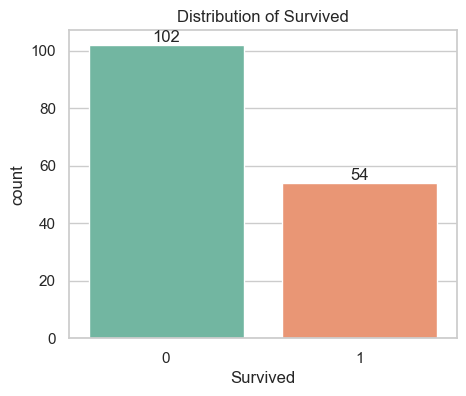

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
ax = sns.countplot(x="Survived" , data = data , palette="Set2")
plt.title("Distribution of Survived")
for container in ax.containers:
  ax.bar_label(container)
plt.show()

### Phân phối categorical_feature

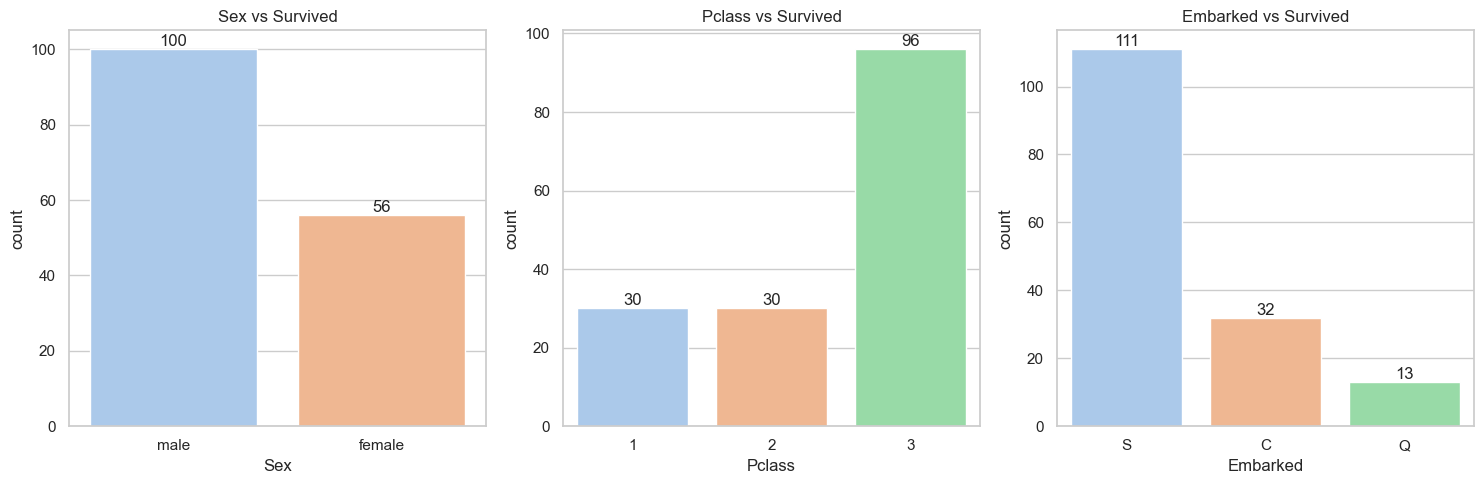

In [32]:
fig , axes = plt.subplots(1,3 , figsize = (15,5))
sns.countplot(x = "Sex" , data = data , ax = axes[0] , palette="pastel")
axes[0].set_title("Sex vs Survived")
for container in axes[0].containers:
  axes[0].bar_label(container)
sns.countplot(x = "Pclass" , data = data , ax = axes[1] , palette="pastel")
axes[1].set_title("Pclass vs Survived")
for container in axes[1].containers:
  axes[1].bar_label(container)
sns.countplot(x = "Embarked" , data = data , ax = axes[2] , palette = "pastel")
axes[2].set_title("Embarked vs Survived")
for container in axes[2].containers:
  axes[2].bar_label(container)
plt.tight_layout()
plt.show()

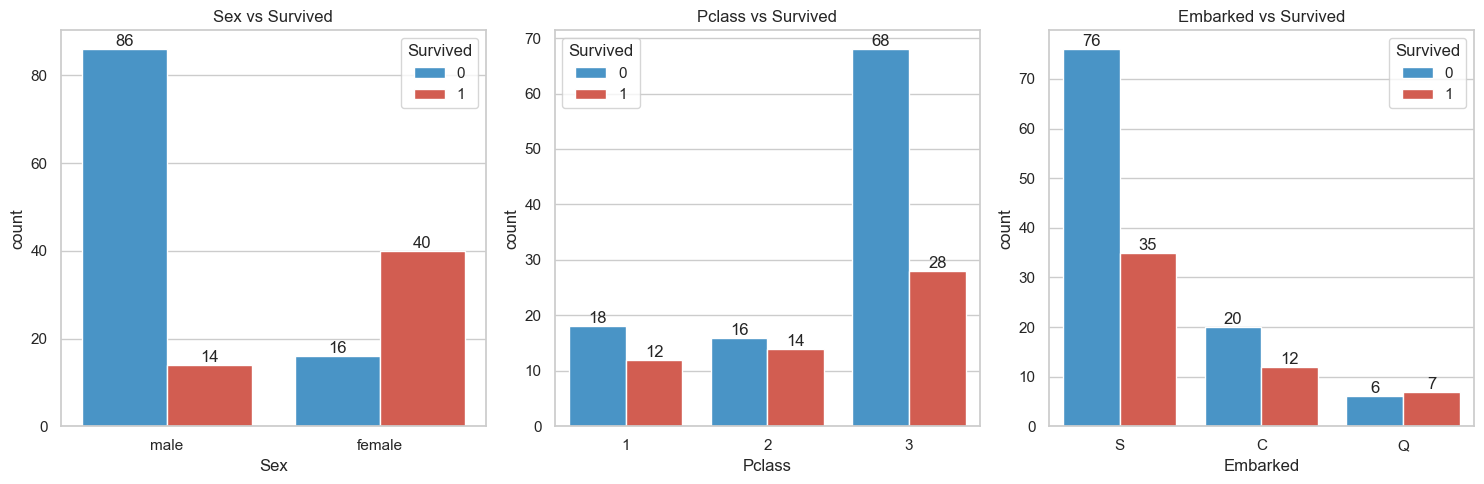

In [33]:
fig , axes = plt.subplots(1,3 , figsize = (15,5))
sns.countplot(x = "Sex" ,hue="Survived", data = data , ax = axes[0] , palette=["#3498db", "#e74c3c"])
axes[0].set_title("Sex vs Survived")
for container in axes[0].containers:
  axes[0].bar_label(container)
sns.countplot(x = "Pclass" , hue="Survived" ,  data = data , ax = axes[1] , palette=["#3498db", "#e74c3c"])
axes[1].set_title("Pclass vs Survived")
for container in axes[1].containers:
  axes[1].bar_label(container)
sns.countplot(x = "Embarked" ,hue="Survived" ,data = data , ax = axes[2] , palette=["#3498db", "#e74c3c"])
axes[2].set_title("Embarked vs Survived")
for container in axes[2].containers:
  axes[2].bar_label(container)
plt.tight_layout()
plt.show()

### Numerical features 

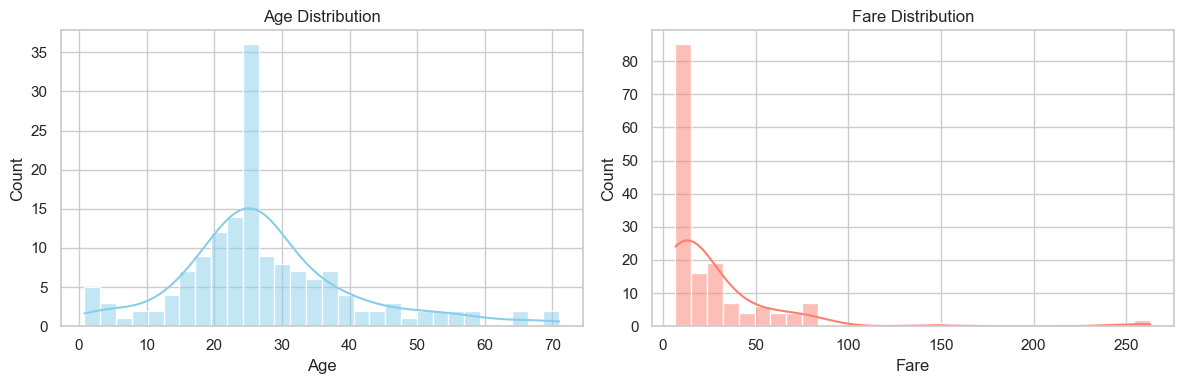

In [34]:
fig , axes = plt.subplots(1 , 2 , figsize = (12,4))
sns.histplot(data["Age"] , bins=30 , kde = True , ax = axes[0] , color="skyblue")
axes[0].set_title("Age Distribution")

sns.histplot(data["Fare"] , bins = 30 , kde = True , ax = axes[1] , color = "salmon")
axes[1].set_title("Fare Distribution")

plt.tight_layout()
plt.show()

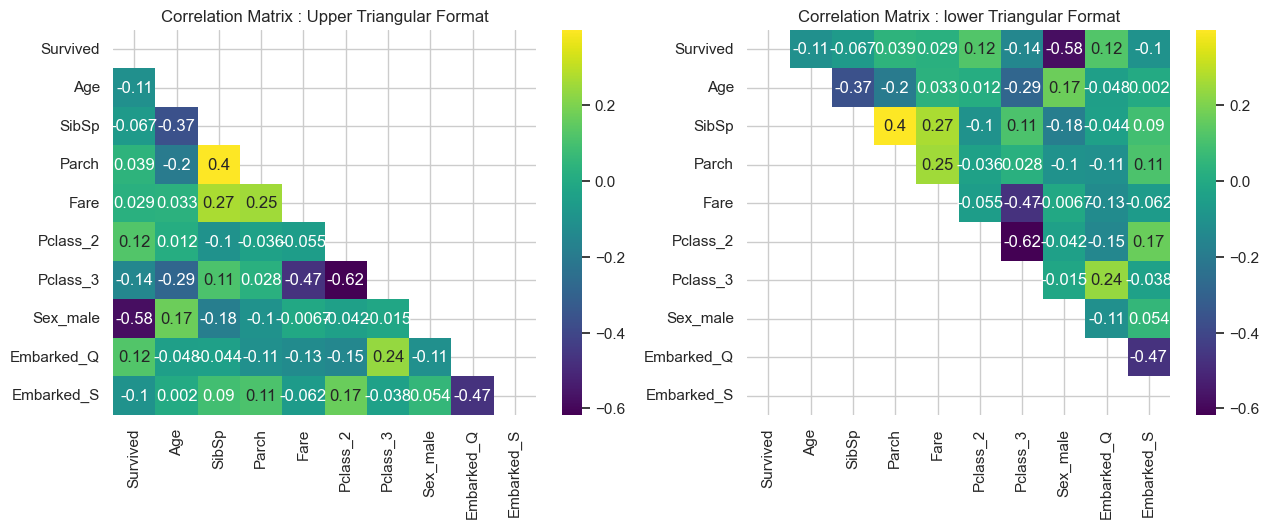

In [35]:
df_encoded = data.copy()

df_encoded = pd.get_dummies(df_encoded, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
upper_triangle = np.triu(df_encoded.corr())
lower_triangle = np.tril(df_encoded.corr())

fig , ax = plt.subplots(1 , 2 , figsize=  (15,5))
plt.subplot(1,2,1 )
sns.heatmap(df_encoded.corr() , cmap = 'viridis' , annot= True , mask = upper_triangle , cbar = True)
plt.title('Correlation Matrix : Upper Triangular Format')

plt.subplot(1,2,2 )
sns.heatmap(df_encoded.corr() , cmap = 'viridis' , annot= True , mask = lower_triangle , cbar = True)
plt.title('Correlation Matrix : lower Triangular Format')
plt.show()


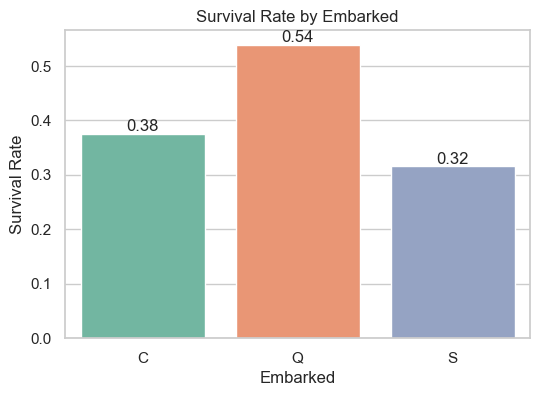

In [36]:
survival_rate = data.groupby("Embarked")["Survived"].mean().reset_index()

plt.figure(figsize=(6,4))
ax = sns.barplot(x="Embarked", y="Survived", data=survival_rate, palette="Set2")
plt.title("Survival Rate by Embarked")
plt.ylabel("Survival Rate")
for container in ax.containers:
  ax.bar_label(container, labels=[f"{v.get_height():.2f}" for v in container])

plt.show()

# Nhận xét sau khi trực quan hóa dữ liệu Titanic

## 1. Biểu đồ phân phối Age
- Hành khách chủ yếu trong độ tuổi 20–40.  
- Có một số trẻ nhỏ (0–10 tuổi) và ít người cao tuổi.  
- Điều này phản ánh Titanic phục vụ nhiều người trong độ tuổi lao động, gia đình trẻ.  

## 2. Biểu đồ phân phối Fare
- Đa số hành khách có vé giá rẻ (< 50).  
- Có một số trường hợp vé rất cao → thể hiện sự chênh lệch giàu nghèo.  
- Fare có phân phối lệch phải (right-skewed).  

## 3. Biểu đồ phân phối Sex
- Số nam nhiều hơn số nữ.  
- Điều này ảnh hưởng đến tỉ lệ sống sót vì Titanic áp dụng quy tắc "Women and children first".  

## 4. Biểu đồ phân phối Pclass
- Lớp 3 chiếm nhiều nhất, sau đó đến lớp 1 và lớp 2.  
- Thể hiện Titanic chở nhiều hành khách hạng bình dân.  

## 5. Biểu đồ phân phối Survived
- Tỉ lệ sống sót thấp (~38%).  
- Cho thấy thảm họa có tỉ lệ tử vong cao.  

## 6. Biểu đồ phân phối Embarked
- Hầu hết hành khách lên tàu từ cảng S (Southampton).  
- Một số lên từ C (Cherbourg) và Q (Queenstown).  
- Có thể là các khoan Cherbourg (C) và Queenstown (Q) này gần với phao cứu sinh , dễ tiếp xúc với cứu hộ hơn hoặc thuộc tâng lớp cao hơn
- Southampton (S) là nơi nhiều người lên tàu nhất, nhiều người thuộc tầng lớp lao động → khả năng sống sót thấp hơn.

## Feature Engineering

In [37]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


#### **Ở đây em áp dụng nhiều mô hình cho tất cả lên chọn StandardScaler**
- Có thểm làm 2 pipeline : 
  1. Cho các mô hình như LogisticRegrssion , SVM - StandardScaler 
  2. Cho các mô hình như SVM , KNN
#### **Tạo ra đặc trứng mới FamilySize từ 2 cột SibSp và Parch**
#### **Encode các cột categorical [Sex , Embarked]**

In [38]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
from sklearn.preprocessing import StandardScaler
data['Family_total'] = data['SibSp'] + data['Parch'] + 1 
data.drop(['SibSp', 'Parch'], axis=1, inplace=True, errors='ignore')
data["Sex"] = data["Sex"].map({"male" : 0 , "female" : 1})
data = pd.get_dummies(data , columns=["Embarked" , "Pclass"] , drop_first= True)
scaler = StandardScaler()
num_cols = ["Age" , "Fare" , "Family_total"]
data[num_cols] = scaler.fit_transform(data[num_cols])
data.head()


,Survived,Sex,Age,Fare,Family_total,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0,-0.437089,-0.531122,-0.007967,False,True,False,True
1,1,1,0.783472,1.099279,-0.007967,False,False,False,False
2,1,1,-0.131949,-0.513935,-0.629387,False,True,False,True
3,1,1,0.554617,0.636300,-0.007967,False,True,False,False
4,0,0,0.554617,-0.510753,-0.629387,False,True,False,True


## MinMaxScaler và StandardScaler trong xử lý dữ liệu

### 1. MinMaxScaler
- **Khái niệm**:  
  MinMaxScaler là phương pháp chuẩn hóa dữ liệu (Normalization), đưa các giá trị của đặc trưng về một khoảng xác định (thường là [0, 1]).

- **Công thức**:  
  $$
  X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
  $$

- **Đặc điểm**:  
  - Giữ nguyên **phân bố gốc** của dữ liệu, chỉ thay đổi tỷ lệ.  
  - Nhạy cảm với **outlier** (giá trị ngoại lai).  

- **Ứng dụng**:  
  - Dùng trong các mô hình yêu cầu dữ liệu trong khoảng cố định, ví dụ **mạng nơ-ron (Neural Networks), KNN, SVM với kernel RBF**.  
  - Thường dùng khi biết rõ dữ liệu không có outlier lớn.  

---

### 2. StandardScaler
- **Khái niệm**:  
  StandardScaler là phương pháp chuẩn hóa dữ liệu theo phân phối chuẩn (Standardization), biến đổi dữ liệu để có **trung bình bằng 0** và **độ lệch chuẩn bằng 1**.

- **Công thức**:  
  $$
  X' = \frac{X - \mu}{\sigma}
  $$

  Trong đó:  
  - $\mu$: giá trị trung bình của đặc trưng.  
  - $\sigma$: độ lệch chuẩn của đặc trưng.  

- **Đặc điểm**:  
  - Phân phối dữ liệu sau khi chuẩn hóa có trung bình 0, phương sai 1.  
  - Ít bị ảnh hưởng bởi **outlier** hơn MinMaxScaler.  

- **Ứng dụng**:  
  - Dùng trong các thuật toán giả định dữ liệu có phân phối chuẩn, ví dụ: **Hồi quy tuyến tính, Logistic Regression, SVM, PCA, K-Means**.  
  - Thích hợp khi dữ liệu có thang đo và phân phối khác nhau giữa các đặc trưng.  

---

### 3. So sánh nhanh
| Tiêu chí            | MinMaxScaler                  | StandardScaler              |
|----------------------|-------------------------------|-----------------------------|
| Khoảng giá trị       | [0, 1] (hoặc tuỳ chỉnh)      | Không cố định (trung bình 0, std 1) |
| Ảnh hưởng outlier    | Nhạy cảm                     | Ít nhạy cảm hơn             |
| Giữ phân bố gốc      | Có                           | Không                       |
| Thường dùng cho      | Mô hình dựa khoảng cách, NN  | Mô hình giả định phân phối chuẩn |


## **Áp dụng các mô hình**

In [40]:
## import các thư viện dùng để đánh giá mô hình & chia dữ liệu 
from sklearn.model_selection import train_test_split , cross_val_score 
from sklearn.metrics import (accuracy_score , precision_score , recall_score , f1_score , classification_report , confusion_matrix)
X = data.drop("Survived" , axis = 1)
y = data["Survived"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 42 , stratify=y)

### **Sử dụng thuật toán KNN**
- KNN là 1 thuật toán supervived machine learning được sử dụng rộng rãi trong phân loại và hồi quy 
- Ý tưởng :
-- Phân loại : chọn nhãn xuất hiện nhiều nhất trong nhóm k láng giềng(đa số phiếu)
-- Hồi quy : lấy giá trị trung bình của k láng giềng 
- Khoảng cách giữa các điểm thường dùng là Euclidean,..
- Việc lựa chọn tham số k cũng rất quan trọng 
-- K quá nhỏ -> nhạy cảm với dữ liệu (outlier)
-- K quá lớn -> Mô hình dễ bị underfiting 
-- Khoảng cách giữa các điểm có thể được xác định qua công thức 
-- 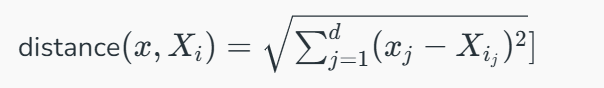
-- 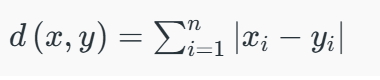
-- 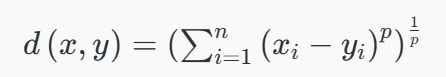

Best k: 5
Best cross-validation accuracy: 0.7146586027311782


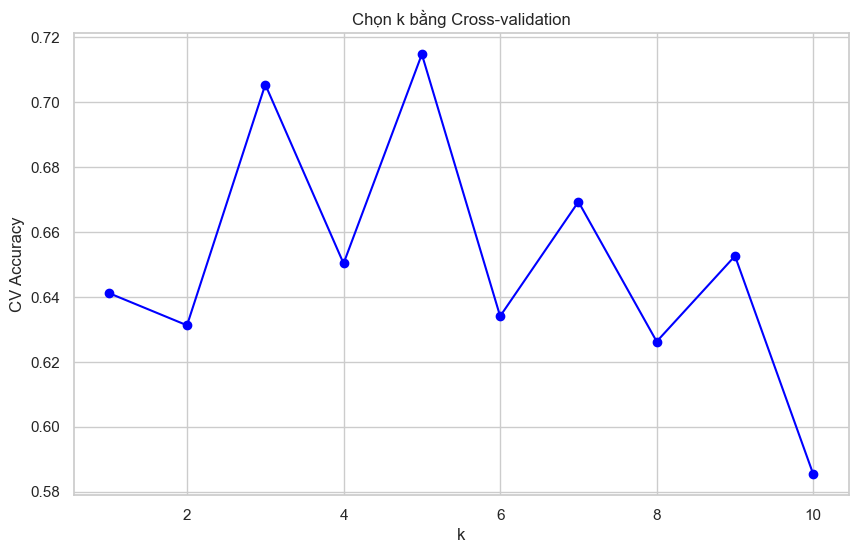

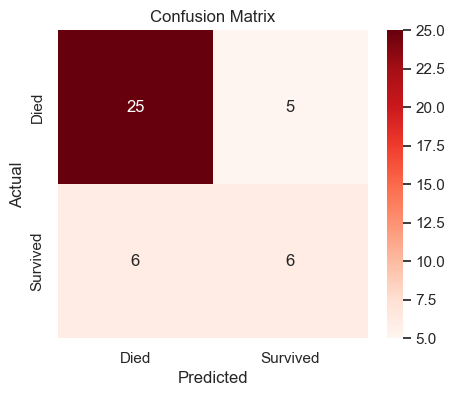

              precision    recall  f1-score    support
Died           0.806452  0.833333  0.819672  30.000000
Survived       0.545455  0.500000  0.521739  12.000000
accuracy       0.738095  0.738095  0.738095   0.738095
macro avg      0.675953  0.666667  0.670706  42.000000
weighted avg   0.731881  0.738095  0.734548  42.000000


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score

X = data.drop("Survived", axis=1)
y = data["Survived"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=42)
kmax = 10 
ks = range(1 , kmax+1)
cv_scores = []

for k in ks :
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring="f1_macro")
    cv_scores.append(scores.mean())

best_k = ks[np.argmax(cv_scores)]
best_score = max(cv_scores)
print("Best k:", best_k)
print("Best cross-validation accuracy:", best_score)
plt.figure(figsize=(10,6))
plt.plot(ks, cv_scores, marker='o', color='blue')
plt.xlabel("k")
plt.ylabel("CV Accuracy")
plt.title("Chọn k bằng Cross-validation")
plt.grid(True)
plt.show()

### Áp dụng k tốt nhất cho mô hình KNN 
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train , y_train)
### Đánh giá mô hình qua các metrix (accuracy , f1 , precision , recall , confusion matrix)
y_pred = knn_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["Died", "Survived"], 
            yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(
    y_test, y_pred,
    target_names=["Died", "Survived"],
    output_dict=True
)

df = pd.DataFrame(report).transpose()
print(df)

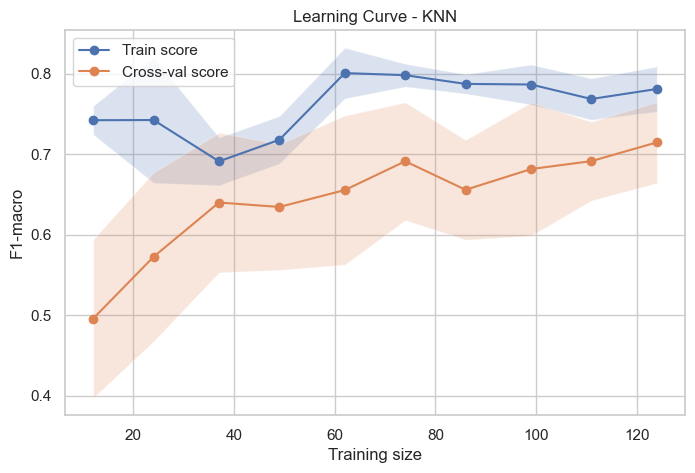

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

train_sizes, train_scores, test_scores = learning_curve(
    knn, X, y, cv=5, scoring="f1_macro", 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Tính trung bình & độ lệch chuẩn
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label="Train score")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-val score")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2)
plt.xlabel("Training size")
plt.ylabel("F1-macro")
plt.title("Learning Curve - KNN")
plt.legend()
plt.show()

### Sử dụng thuật toán **Logistic Regression**
-- Logistic Regression là 1 thuật toán supervised machine learning used for cho bài toán phân loại nhị phân 
--  Logistic Regression sử dụng hàm Sigmoid(Loss Function)
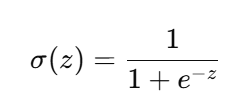
--- Chuyển giá trị đầu vào nằm trong khoảng (0,1)
-- Losgitic sử dụng hàm Binary Cross-Entropy thay vì MSE như Linear Regression để tối ưu Gradient 
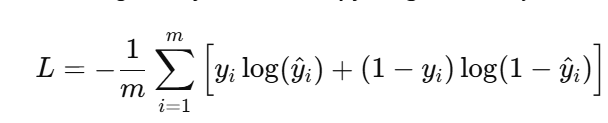
-- Ưu điểm : 
--- ĐƠn giản dễ dùng , hoạt động tốt với dữ liệu tuyến tính 
-- Nhược điểm : 
--- Nhạy cảm với outlier , dữ liệu phi tuyến , phương sai cao 

In [48]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_score

# Danh sách mô hình
models = {
    "LogisticRegression": LogisticRegression(class_weight="balanced", max_iter=1000, solver="liblinear"),
    "DecisionTree": DecisionTreeClassifier(class_weight="balanced"),
    "RandomForest": RandomForestClassifier(class_weight="balanced"),
    "SVC": SVC(class_weight="balanced"),
    "Naive_Bayes": GaussianNB()
}

# Đánh giá từng mô hình
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="f1_macro")
    print(f"############## {name} ##############")
    print("F1-macro từng fold:", scores)
    print("Mean F1-macro:", np.mean(scores))
    print("Std:", np.std(scores))
    print()

############## LogisticRegression ##############
F1-macro từng fold: [0.8        0.77857143 0.81028152 0.71818182 0.72807018]
Mean F1-macro: 0.7670209879879403
Std: 0.037403025684236646

############## DecisionTree ##############
F1-macro từng fold: [0.73333333 0.6039489  0.82720178 0.63095238 0.63135135]
Mean F1-macro: 0.6853575491984824
Std: 0.08357681877393702

############## RandomForest ##############
F1-macro từng fold: [0.70909091 0.63529412 0.81997677 0.65850673 0.73439412]
Mean F1-macro: 0.7114525309454793
Std: 0.064672662320878

############## SVC ##############
F1-macro từng fold: [0.69459173 0.73439412 0.81028152 0.7047619  0.81997677]
Mean F1-macro: 0.7528012094158056
Std: 0.052633603649924775

############## Naive_Bayes ##############
F1-macro từng fold: [0.6        0.77857143 0.81028152 0.64772727 0.66880342]
Mean F1-macro: 0.7010767275699956
Std: 0.08004417596316432



### Mô hình **Logisitc Regression** && **SVC** Tốt nhất dùng Áp dụng Grid_Search

===== Logistic Regression =====
Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Best F1-macro (CV): 0.7499134424286554

Classification Report (Logistic):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.91      0.83      0.87        12

    accuracy                           0.93        42
   macro avg       0.92      0.90      0.91        42
weighted avg       0.93      0.93      0.93        42



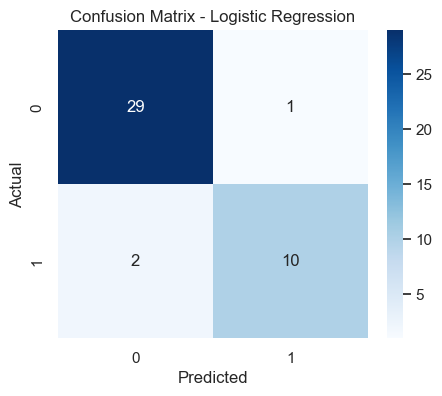


===== SVC =====
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1-macro (CV): 0.7369832353808012

Classification Report (SVC):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.91      0.83      0.87        12

    accuracy                           0.93        42
   macro avg       0.92      0.90      0.91        42
weighted avg       0.93      0.93      0.93        42



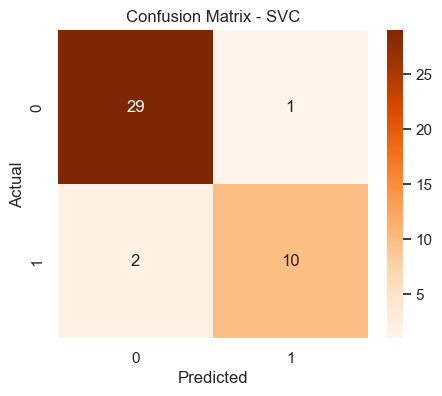

In [56]:
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(class_weight="balanced", solver="liblinear", max_iter=1000)
param_grid_logistic = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"]
}
grid_logistic = GridSearchCV(
    estimator=logistic,
    param_grid=param_grid_logistic,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)
grid_logistic.fit(X_train, y_train)

print("===== Logistic Regression =====")
print("Best Parameters:", grid_logistic.best_params_)
print("Best F1-macro (CV):", grid_logistic.best_score_)

y_pred_log = grid_logistic.predict(X_test)
print("\nClassification Report (Logistic):")
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

svc = SVC(class_weight="balanced")
param_grid_svc = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}
grid_svc = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_svc,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)
grid_svc.fit(X_train, y_train)

print("\n===== SVC =====")
print("Best Parameters:", grid_svc.best_params_)
print("Best F1-macro (CV):", grid_svc.best_score_)

y_pred_svc = grid_svc.predict(X_test)
print("\nClassification Report (SVC):")
print(classification_report(y_test, y_pred_svc))

cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(5,4))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




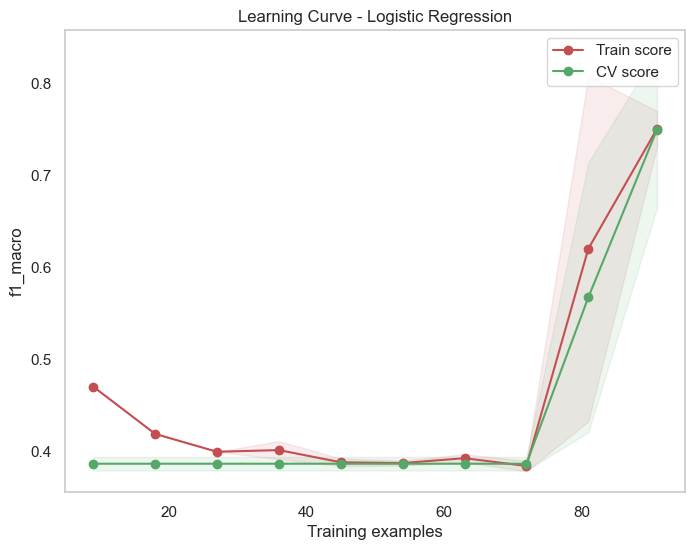

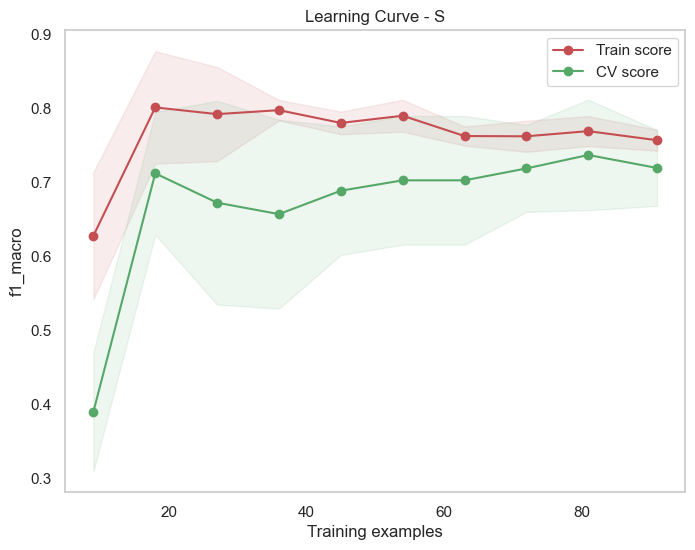

In [57]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring="f1_macro"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    # Vẽ mean và vùng ±1 std
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="CV score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


# --- Logistic Regression ---
plot_learning_curve(grid_logistic.best_estimator_, X_train, y_train, title="Learning Curve - Logistic Regression")

# --- SVC ---
plot_learning_curve(grid_svc.best_estimator_, X_train, y_train, title="Learning Curve - S")